# TP1 Computer Vision I

## Parte 1

## Import library

In [145]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt

data2 ='./white_patch/'
data1 ='./coord_cromaticas/'

## Data

In [146]:
img_Coord1 = cv.imread(data1+'CoordCrom_1.png', cv.IMREAD_GRAYSCALE)
img_Coord2 = cv.imread(data1+'CoordCrom_2.png', cv.IMREAD_GRAYSCALE)
img_Coord3 = cv.imread(data1+'CoordCrom_3.png', cv.IMREAD_GRAYSCALE)

In [148]:
# Ahora quiero verla como imagen en color
img_color = cv.imread(data1+'CoordCrom_2.png')

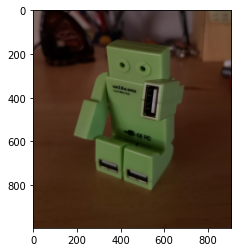

In [149]:
# Paso la imagen de BRG a RGB
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

### 1-Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste

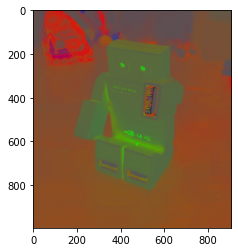

True

In [150]:
# separamos los 3 colores en 3 matrices
im_r, im_g, im_b = cv.split(imgRGB)

im_total = (np.uint(im_r) + np.uint(im_g) + np.uint(im_b))
im_total[im_total == 0] = 1
img_new_r = im_r/im_total
img_new_r = np.clip(img_new_r, 0, 255)
img_new_g = im_g/im_total
img_new_g = np.clip(img_new_g, 0, 255)
img_new_b = im_b/im_total
img_new_b = np.clip(img_new_b, 0, 255)

imgRGB2 = cv.merge((img_new_r, img_new_g, img_new_b))
#imgRGB2 = (imgRGB2*255).astype('uint8')

plt.imshow(imgRGB2)
plt.show()
cv.imwrite('modificada.png', imgRGB2)

### Funcion para probar el algoritmo de pasaje a coordenadas cromáticas de nuestra última imagen.

In [151]:
def change_contrast(input_image:np.ndarray, contrast:int) -> np.ndarray:
    '''
    Argumentos
    img: Imagen de entrada
    contrast: Valor porcentual de contraste
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con el nuevo contraste
    '''
    img_new = (1 + contrast / 100) * input_image
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits
    img_new = img_new.astype('uint8')

    return img_new


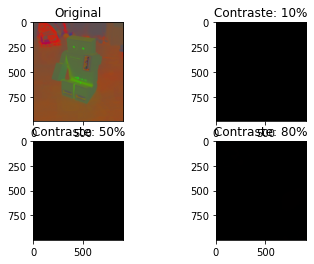

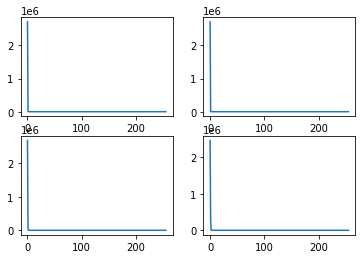

In [152]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(imgRGB2, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1, bins1 = np.histogram(imgRGB2.ravel(), 256, [0, 256])

# Modificamos contraste 10%
new_contrast = 10
img_mod = change_contrast(input_image=imgRGB2, contrast=new_contrast)

ax2=plt.subplot(222)
ax2.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax2.set_title(f'Contraste: {new_contrast}%')

hist2,bins2 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos contraste 50%
new_contrast = 50
img_mod = change_contrast(input_image=imgRGB2, contrast=new_contrast)

ax3=plt.subplot(223)
ax3.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax3.set_title(f'Contraste: {new_contrast}%')

hist3,bins3 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos contraste 80%
new_contrast = 80
img_mod = change_contrast(input_image=imgRGB2, contrast=new_contrast)

ax4=plt.subplot(224)
ax4.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax4.set_title(f'Contraste: {new_contrast}%')

hist4,bins4 = np.histogram(img_mod.ravel(),256,[0,256])

plt.show()

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1)
plt.subplot(222), plt.plot(hist2)
plt.subplot(223), plt.plot(hist3)
plt.subplot(224), plt.plot(hist4)
plt.show()

### 2-Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [153]:
# test_blue = cv.imread(data2+'wp_red.png')
#test_green = cv.imread(data2+'test_green.png')
test_blue = cv.imread(data2+'test_red.png')
#test_blue = cv.imread(data2+'test_blue.png')

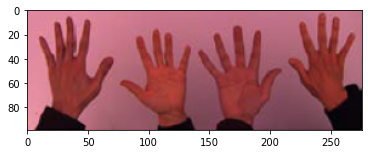

In [154]:
# Paso la imagen de BRG a RGB
imgRGB_W = cv.cvtColor(test_blue, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB_W)
plt.show()

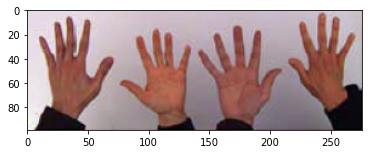

True

In [155]:
# Vamos a eliminar un plano y reconstruimos la imagen
im_r, im_g, im_b = cv.split(imgRGB_W)

im_r = im_r/np.amax(im_r)
im_r = np.clip(im_r, 0, 1)
im_g = im_g/np.amax(im_g)
im_g = np.clip(im_g, 0, 1)
im_b = im_b/np.amax(im_b)
im_b = np.clip(im_b, 0, 1)
imgRGB4_W = cv.merge((np.uint8(255*(im_r)), np.uint8(255*(im_g)), np.uint8(255*(im_b))))


plt.imshow(imgRGB4_W)
plt.show()
cv.imwrite('modificada1.png', imgRGB4_W)

### 3-Analisis de resultados.

##### Los resultados de las imágenes están presentados luego de cada algoritmo, se probó el algoritmo de pasaje de coordenadas con resultados satisfactorios y en el caso de algoritmo White Patch tenemos el problema de la saturación que es evidente en el ejemplo del "depredador iluminado por luz roja" (wp_red.png). Esta saturación está en la imagen original y solo se podría mejorar la respuesta de white patch volviendo a colorear "artificialmente" esta, es decir modificandola.

## Parte 2

### 1-Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

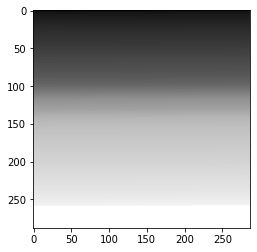

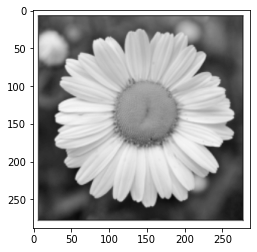

In [156]:
img1_tp = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_tp = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img1_tp, cmap='gray')
plt.show()
plt.imshow(img2_tp, cmap='gray')
plt.show()

### 2-Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

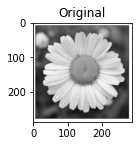

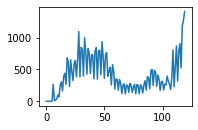

In [157]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img2_tp, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1, bins1 = np.histogram(img2_tp.ravel(), 120, [0, 200])

plt.show()
# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1)
#

plt.show()

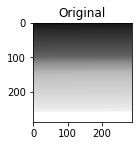

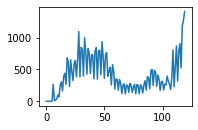

In [158]:
# Nueva figura
fig = plt.figure()
# Imagen original
ax1=plt.subplot(222)
ax1.imshow(img1_tp, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist2, bins2 = np.histogram(img1_tp.ravel(), 120, [0, 200])

plt.show()
# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(222), plt.plot(hist2)
plt.show()

### Analisis de resultados.

##### Los histogramas solo me dan información de cambios de constraste y para saber si la imagen fue "retocada", podría servir en ese caso. Pero como único modelo de clasificación/detección de imágenes, no lo creo conveniente. Ya que pueden haber dos imágenes con el mismo histograma, pero ser completamente distintas.

### 3-Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

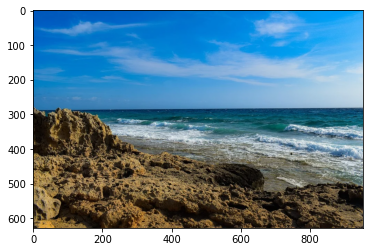

In [159]:
img_segmentacion = cv.imread('segmentacion.png')
img_segmentacion  = cv.cvtColor(img_segmentacion , cv.COLOR_BGR2RGB)
plt.imshow(img_segmentacion)
plt.show()

In [160]:
im_Seg_r, im_Seg_g, im_Seg_b = cv.split(img_segmentacion)

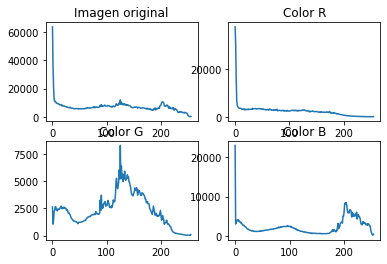

In [161]:
hist1,bins1 = np.histogram(img_segmentacion.ravel(), 256, [0, 256])

hist2,bins2 = np.histogram(im_Seg_r.ravel(), 256, [0, 256])

hist3,bins3 = np.histogram(im_Seg_g.ravel(),256,[0,256])


hist4,bins4 = np.histogram(im_Seg_b.ravel(),255,[0,255])

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
ax1=plt.subplot(221)
ax1.set_title('Imagen original')
ax1.plot(hist1)
ax2=plt.subplot(222)
ax2.set_title('Color R')
ax2.plot(hist2)
ax3=plt.subplot(223)
ax3.set_title('Color G')
ax3.plot(hist3)
ax4=plt.subplot(224)
ax4.set_title('Color B')
ax4.plot(hist4)
plt.show()

###### Según los histogramas el menor componente en la imagen es el color verde. El color rojo forma parte de gran parte de la imagen (por el blanco, conjunto de los 3 colores) y el diferenciado en una parte de la imagen es el color azul.

Binarizacion

In [162]:
# Funcion de binarización (a mano)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

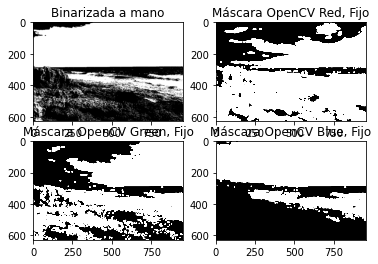

In [163]:
# im_Seg_r, im_Seg_g, im_Seg_b
# Nueva figura
fig = plt.figure()
img_segmentacion_gray = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2GRAY)
# Imagen binarizada (a mano - Fijo)
ax2=plt.subplot(221)
img_bin = global_threshold(img_segmentacion_gray, 120, 1, 0);
ax2.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax2.set_title('Binarizada a mano')

# Imagen binarizada (embebida - Fijo) - Parámetros: Imag_original,umbral,valor_máximo,método
ax3=plt.subplot(222)
ret_r, thresh_r = cv.threshold(im_Seg_r,70,255,cv.THRESH_BINARY)
ax3.imshow(thresh_r,cmap='gray', vmin=0, vmax=1)
ax3.set_title('Máscara OpenCV Red, Fijo')

# Imagen binarizada (embebida - Otsu) - Parámetros: Imag_original,umbral,valor_máximo,método
ax4=plt.subplot(223)
ret_g, thresh_g = cv.threshold(im_Seg_g,150,255,cv.THRESH_BINARY)
ax4.imshow(thresh_g,cmap='gray', vmin=0, vmax=1)
ax4.set_title('Máscara OpenCV Green, Fijo')

# Imagen binarizada (embebida - Mediana) - Parámetros: Imag_original,valor_máximo,método adaptativo,tipo de umbral,tamaño de bloque,C
ax5=plt.subplot(224)
ret_b, thresh_b = cv.threshold(im_Seg_b,190,255,cv.THRESH_BINARY)
ax5.imshow(thresh_b,cmap='gray', vmin=0, vmax=1)
ax5.set_title('Máscara OpenCV Blue, Fijo')

plt.show()

##### En las mascaras es posible separar el color azul "cielo" y el verde "mar" pero no el rojo "tierra"(ya que este color esta en gran parte de la imagen).


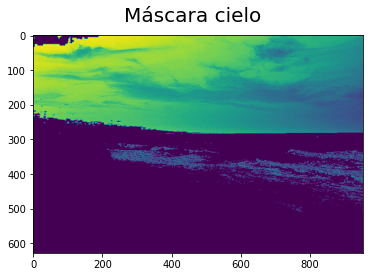

In [164]:
fig = plt.figure()
cielo=img_segmentacion_gray*thresh_b
plt.imshow(cielo)
fig.suptitle('Máscara cielo', fontsize=20)
plt.show()

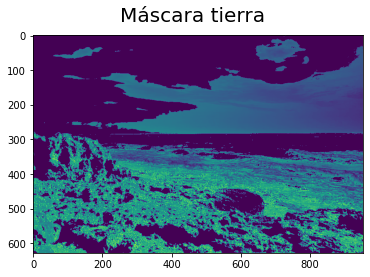

In [165]:
fig = plt.figure()
tierra = img_segmentacion_gray*thresh_r
plt.imshow(tierra)
fig.suptitle('Máscara tierra', fontsize=20)
plt.show()